In [2]:
# Mengimpor library & package yang digunakan

import re
import nltk
import stanza
import pandas as pd
import matplotlib.pyplot as plt

from pprint import pprint
from wordcloud import WordCloud
from IPython.display import display
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## **A - Corpus Statistics (25 Poin)**

### **1. [1] Berapakah jumlah data yang terdapat pada “Korpus.json”?**

In [3]:
# Mengimpor file Korpus.json
korpus_df = pd.read_json('Dataset Tugas 1/Korpus.json')

# Menampilkan shape & display dari Korpus.json
print(korpus_df.shape)
display(korpus_df)

(1051, 10)


,section,articleid,articletype,createdate,author,originalTitle,tag,keywords,subsection,content
0,ekonomi,548551,singlepage,2020-09-20 12:18:07,BPH Migas,BPH Migas-Pertamina Akan Bangun SPBN di Krui,bph migas|krui,"bph migas, krui",Ragam Energi,Kepala BPH Migas M. Fashurullah Asa mengadakan...
1,nasional,548550,singlepage,2020-09-20 12:17:24,CNN Indonesia,GNPF Ulama Sumut Galang Petisi Tunda Pilkada 2020,pilkada medan|pilkada medan 2020|gnpf ulama|sumut,"pilkada medan, pilkada medan 2020, gnpf ulama,...",Berita Peristiwa,Gerakan Nasional Pengawal Fatwa (GNPF) Ulama S...
2,internasional,548512,singlepage,2020-09-20 09:45:28,author,AS Tunda Larangan TikTok Hingga 27 September,amerika serikat|tiktok|larangan tiktok,"amerika serikat, tiktok, larangan tiktok",Berita Eropa Amerika,Kementerian Perdagangan Amerika Serikat mengum...
3,teknologi,548509,singlepage,2020-09-20 08:52:22,author,Penyebab Transmisi Matic Mobil Lemot,konsultasi otomotif|cara menggunakan transmisi...,"konsultasi otomotif, cara menggunakan transmis...",Ragam Otomotif,Pertanyaan: Apa penyebab transmisi matic mobil...
4,hiburan,548507,singlepage,2020-09-20 08:09:35,author,Felicity Jones Kenang Sosok Hakim Agung AS Rut...,felicity jones|ruth bader ginsburg|ruth bader ...,"felicity jones, ruth bader ginsburg, ruth bade...",Berita Seleb,Aktris Felicity Jones turut mengenang sosok Ha...
...,...,...,...,...,...,...,...,...,...,...
1046,hiburan,539470,singlepage,2020/08/26 12:59:34,Tim,Thunderstruck dan Film tentang Basket untuk Pe...,artikel timeless|rekomendasi film|film tentang...,"artikel timeless, rekomendasi film, film tenta...",Ragam Film,Film yang mengangkat tema olahraga tak begitu ...
1047,hiburan,538532,singlepage,2020/08/24 09:49:53,Tim,Film Detektif Korea yang Seru dan Penuh Teka-teki,artikel timeless|rekomendasi film|film korea|f...,"artikel timeless, rekomendasi film, film korea...",Ragam Film,Film Koreamemiliki beragam tema unggulan selai...
1048,hiburan,532456,singlepage,2020/08/05 14:16:13,Tim,"6 Film Horor Barat Terseram, Bikin Bulu Kuduk ...",artikel timeless|film horor|film horor barat|f...,"artikel timeless, film horor, film horor barat...",Ragam Film,Tidak bisa dimungkiri Hollywood mampu memprodu...
1049,hiburan,528516,singlepage,2020/07/24 13:01:53,Tim,Hospital Playlist dan Drama Korea yang Dibinta...,artikel timeless|drama korea|rekomendasi drama...,"artikel timeless, drama korea, rekomendasi dra...",Ragam Film,Jo Jung-suk memulai kariernya di dunia hiburan...


Terdapat **1050** data pada dokumen `Korpus.json`

### **2. [6] Pada soal ini, lakukan analisa untuk fitur “section” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini!**

a. [2] Hitunglah berapa banyak jumlah “section” yang **unik**. Sebutkan “section” apa saja yang terdapat dalam korpus tersebut!

In [4]:
# Mengekstrak series section dari korpus
section_arr = korpus_df['section']

# Mengeliminasi duplikat pada section
section_arr_unique = section_arr.unique()

print(f'Terdapat {section_arr_unique.size} section yang unik')
print('Section-section tersebut yakni: ')
print(section_arr_unique)

Terdapat 6 section yang unik
Section-section tersebut yakni: 
['ekonomi' 'nasional' 'internasional' 'teknologi' 'hiburan' 'olahraga']


b. [4] Tampilkan jumlah data untuk setiap “section” dalam bentuk **histogram**!

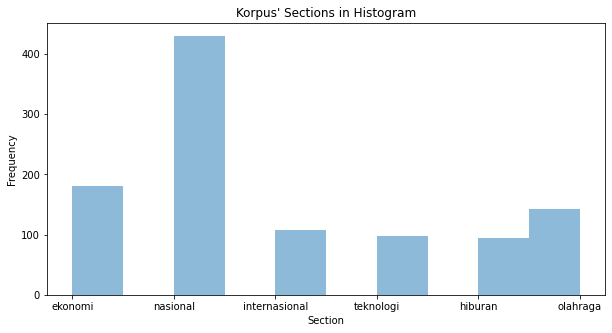

In [5]:
# Menampilkan section dalam bentuk histogram
plt.figure(figsize=(10,5))
plt.title("Korpus' Sections in Histogram", fontsize=12)
plt.hist(section_arr, alpha=0.5)
plt.ylabel("Frequency")
plt.xlabel("Section")
plt.show()

### **3. [12] Pada soal ini, lakukan analisa untuk fitur “content” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini! Untuk mempermudah pengerjaan, suatu token dalam korpus dapat dianggap sebagai kata jika seluruh karakter berupa alphanumeric (A-z, 0-9).**

a. [3] Hitunglah jumlah kata yang unik dalam korpus. Catatan: Kata “Jakarta” dan “jakarta” dianggap sebagai kata yang sama.

In [6]:
# Mengekstrak series content dari korpus
content_arr = korpus_df['content']

unique_words = set()

# Melakukan cleaning pada content; uncasing dan punctuation removing
cleaned_content = content_arr.str.lower()
cleaned_content = cleaned_content.str.replace('[^\w\s]', ' ', regex=True)
cleaned_content = cleaned_content.str.split(expand=True)

# Memasukkan content yang sudah dibersihkan ke set
cleaned_content.apply(unique_words.update)

print(f'Terdapat {len(unique_words)} kata yang unik di dalam korpus')

Terdapat 21913 kata yang unik di dalam korpus


b. [5] Tampilkan 100 kata diurutkan berdasarkan jumlah kemunculan terbanyak dalam bentuk **histogram**! Kemudian, sebutkan 10 kata terbanyak dalam korpus beserta jumlahnya!

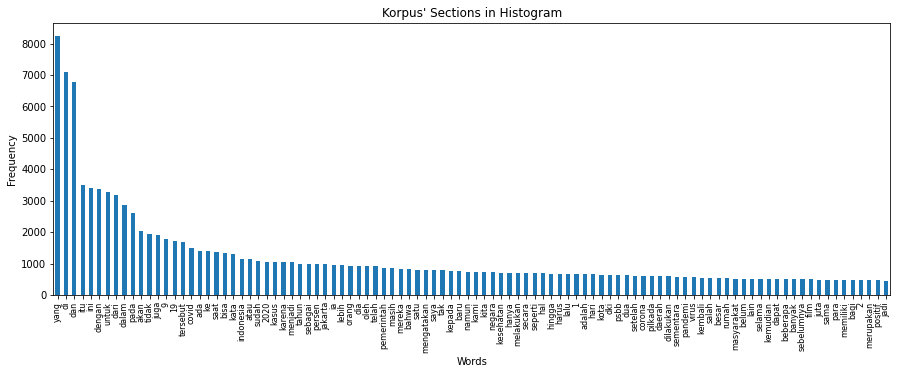

10 kata terbanyak dalam korpus beserta jumlahnya:
yang      8241
di        7086
dan       6781
itu       3493
ini       3393
dengan    3372
untuk     3274
dari      3173
dalam     2866
pada      2616
dtype: int64


In [7]:
# Menghitung occurences/freq dengan value_counts
# Kalau mau pake value_counts, somehow harus pake .split(expand=True) & .stack() atau .explode()
cleaned_content_stack = cleaned_content.stack()
cleaned_content_with_freq = cleaned_content_stack.value_counts()

plt.figure(figsize=(15, 5))
plt.title("Korpus' Sections in Histogram", fontsize=12)
cleaned_content_with_freq[:100].plot(kind='bar')
plt.xticks(rotation='vertical', fontsize=8)
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

print('10 kata terbanyak dalam korpus beserta jumlahnya:')
pprint(cleaned_content_with_freq[:10])

c. [4] Sebutkan 10 kata **bigram** terbanyak dalam korpus!

In [8]:
# Melakukan cleaning (lagi), tapi yang ini .split() nya ga pake expand
cleaned_content = content_arr.str.lower()
cleaned_content = cleaned_content.str.replace('[^\w\s]', ' ', regex=True)
cleaned_content = cleaned_content.str.split()

# Menggunakan 'map' ke series content
# Mengubah list of strings/words menjadi list of bigrams
bigrams = cleaned_content.apply(
    lambda row: list(nltk.ngrams(row, 2))
)

print(bigrams)

# Melakukan counting occurences/freq
bigrams = bigrams.explode()
bigrams = bigrams.dropna()
bigrams = bigrams.value_counts()

print('10 kata bigram terbanyak dalam korpus adalah:')
print(bigrams[:10])

0       [(kepala, bph), (bph, migas), (migas, m), (m, ...
1       [(gerakan, nasional), (nasional, pengawal), (p...
2       [(kementerian, perdagangan), (perdagangan, ame...
3       [(pertanyaan, apa), (apa, penyebab), (penyebab...
4       [(aktris, felicity), (felicity, jones), (jones...
                              ...                        
1046    [(film, yang), (yang, mengangkat), (mengangkat...
1047    [(film, koreamemiliki), (koreamemiliki, beraga...
1048    [(tidak, bisa), (bisa, dimungkiri), (dimungkir...
1049    [(jo, jung), (jung, suk), (suk, memulai), (mem...
1050    [(indonesiamenyatakan, normalisasi), (normalis...
Name: content, Length: 1051, dtype: object
10 kata bigram terbanyak dalam korpus adalah:
(covid, 19)              1400
(saat, ini)               556
(dki, jakarta)            447
(virus, corona)           436
(salah, satu)             320
(cnnindonesia, com)       300
(selain, itu)             258
(rumah, sakit)            252
(di, indonesia)           249
(pr

### 4. [6] Pada soal ini, lakukan analisa untuk fitur “originalTitle” pada korpus dengan menjawab pertanyaan-pertanyaan berikut ini! Identik dengan soal sebelumnya, suatu token dalam korpus dapat dianggap sebagai kata jika seluruh karakter berupa alphanumeric (A-z, 0-9).

a. [2] Berapa rata-rata jumlah kata yang terdapat dalam “originalTitle”?

In [9]:
# Mengekstrak kolom originalTitle menjadi series
og_title_arr = korpus_df['originalTitle']

# Melakukan cleaning ke title
cleaned_title = og_title_arr.str.lower()
cleaned_title = cleaned_title.str.replace('[^\w\s]', ' ', regex=True)
cleaned_title = cleaned_title.str.split()

cleaned_title_word_count = cleaned_title.str.len()
mean = cleaned_title_word_count.mean()

print(f'Rata-rata jumlah kata yang terdapat dalam originalTitle adalah {mean}')

Rata-rata jumlah kata yang terdapat dalam originalTitle adalah 8.533777354900096


b. [4] Tampilkan word cloud untuk fitur “originalTitle” dalam korpus!

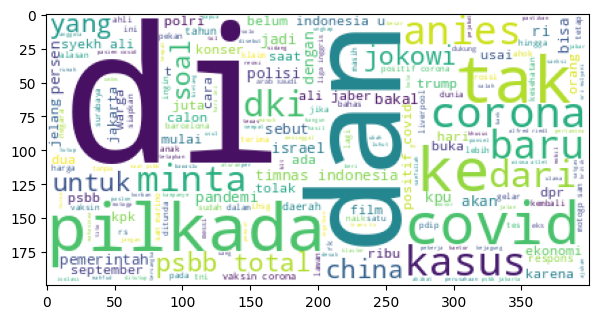

In [10]:
# Melakukan cleaning ke title (lagi), tapi pake .split(expand=True)
cleaned_title = og_title_arr.str.lower()
cleaned_title = cleaned_title.str.replace('[^\w\s]', ' ', regex=True)
cleaned_title = cleaned_title.str.split(expand=True)
cleaned_title = cleaned_title.stack()

cleaned_title = " ".join(list(cleaned_title))

# Menampilkan wordcloud dengan library WordCloud
wordcloud = WordCloud(background_color='white').generate(cleaned_title)
plt.figure(figsize=(7, 5), dpi=100, facecolor='w', edgecolor='w')
plt.imshow(wordcloud)

## **B - Regex (25 Poin)**

### **1. [10] Tuliskan seluruh akun Email yang terdapat pada korpus tersebut dan jumlah setiap akun Email tersebut muncul dalam korpus!**

In [11]:
# Reference: https://stackoverflow.com/questions/8022530/how-to-check-for-valid-email-address

content_str = ' '.join(content_arr)

email_pattern = '(([a-zA-Z0-9-_\.])@([a-zA-Z0-9-_\.]\.[^\W]))'

re.findall(email_pattern, content_str)

[]

### **2. [9] Tuliskan seluruh akun media sosial yang terdapat pada korpus tersebut dan jumlah setiap akun media sosial tersebut muncul dalam korpus!**

In [12]:
# Reference: https://stackoverflow.com/questions/2304632/regex-for-twitter-username

social_str = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)'

social_arr = re.findall(social_str, content_str)

social_df = pd.DataFrame(social_arr, columns=['Words'])

# Hitung value
words_arr = social_df['Words']
words_arr.value_counts()

commuterline           3
chandra_ds             3
miztabay               2
BennyHarmanID          2
listongs               2
NetflixUK              2
ridwankamil            2
TMCPoldaMetro          2
acmawards              2
Aditt_hr               2
Aikaz_F                2
adiw9237               2
basukibtp              2
rr                     1
WallnerAndi            1
jakarta                1
sbotv                  1
syekh                  1
boazsolossa            1
abangriza              1
m3takl_en              1
infobekasi             1
regureg                1
Dwinamasayaa           1
kaesangp               1
HRimanti               1
warung_jurnalis        1
pahlawandigitalumkm    1
rizqiawal              1
tyonarie2              1
txtdaribogor           1
tirta_hudhi            1
prakerja               1
kontributorjakarta     1
ito                    1
firdzaradiany          1
ganangsy               1
MushinAshin3           1
putri_tanjung          1
FerdinandHaean3        1


### **3.  [6] Berdasarkan jawaban dari nomor 2, tentukan akun yang dapat dipastikan merupakan akun Instagram (harus dengan regex untuk menentukannya)!**

In [13]:
instagram_pattern = ""

## **C - Tokenization (15 Poin)**

### **1. [2] Transformasi semua karakter dalam “Korpus_Ringkas.json” ke format lowercase!**

In [14]:
# Mengimpor dataset Korpus_Ringkas.json
korpus_ringkas_df = pd.read_json('Dataset Tugas 1/Korpus_Ringkas.json')

# Mengekstrak series content dari korpus ringkas
content_arr = korpus_ringkas_df['content']

# Uncasing dengan menggunakan API .str.lower()
content_arr = content_arr.str.lower()

# Melakukan mutasi (reassign) pada kolom content di df korpus ringkas
korpus_ringkas_df['content'] = content_arr

display(korpus_ringkas_df)

,id,content
0,0,motogp 2020akan memasuki seri ketujuh yang ber...
1,1,pemerintah provinsi dki jakarta menutup sement...
2,2,ketua komisi pemilihan umum (kpu)arief budiman...
3,3,helikopter milik pt national utility helicopte...
4,4,presiden amerika serikat donald trump dipastik...
5,5,indihome menjawab tuduhan pencurian riwayat pe...
6,6,winger timnas indonesia u-19mochammad supriadi...
7,7,serial she-hulk yang produksi layanan streamin...
8,8,usulan penundaan pilkada serentak 2020 yang me...
9,9,pemerintah membebaskan pajak pertambahan nilai...


### **2. [3] Hilangkan seluruh karakter berupa angka, whitespace berlebih, dan tanda baca!**

In [15]:
# Melakukan text processing: remove excess whitespace, punctuation, dan digit
# Tapi ini kalo digitnya ilang, F1 jadi F doang wkwk
content_arr = content_arr.str.replace('[\W\d\s+]', ' ', regex=True)

# Melakukan mutasi (reassign) pada kolom content di df korpus ringkas
korpus_ringkas_df['content'] = content_arr

display(korpus_ringkas_df)

,id,content
0,0,motogp akan memasuki seri ketujuh yang ber...
1,1,pemerintah provinsi dki jakarta menutup sement...
2,2,ketua komisi pemilihan umum kpu arief budiman...
3,3,helikopter milik pt national utility helicopte...
4,4,presiden amerika serikat donald trump dipastik...
5,5,indihome menjawab tuduhan pencurian riwayat pe...
6,6,winger timnas indonesia u mochammad supriadi...
7,7,serial she hulk yang produksi layanan streamin...
8,8,usulan penundaan pilkada serentak yang me...
9,9,pemerintah membebaskan pajak pertambahan nilai...


### **3. [6] Lakukan tokenisasi pada setiap baris data. Tampilkan hasil tokenisasi berupa list of tokens dari 5 data pertama!**

In [16]:
# Melakukan tokenisasi perbaris menggunakan library nltk
ct_arr_tokenized = content_arr.map(
    lambda content: nltk.word_tokenize(content)
)

print('List of tokens dari 5 data pertama:')
pprint(ct_arr_tokenized[:5])

0     motogp     akan memasuki seri ketujuh yang ber...
1     pemerintah provinsi dki jakarta menutup sement...
2     ketua komisi pemilihan umum  kpu arief budiman...
3     helikopter milik pt national utility helicopte...
4     presiden amerika serikat donald trump dipastik...
5     indihome menjawab tuduhan pencurian riwayat pe...
6     winger timnas indonesia u   mochammad supriadi...
7     serial she hulk yang produksi layanan streamin...
8     usulan penundaan pilkada serentak      yang me...
9     pemerintah membebaskan pajak pertambahan nilai...
10    menteri kesehatan terawan agus putranto menyeb...
11    candyman karya nia dacosta batal meramaikan ha...
12    menteri kesehatan terawan agus putranto mengkl...
13    ketua forum warga kota jakarta azas tigor nain...
14    badan intelijen negara  bin  memperagakan atra...
15    gubernur dki jakarta  anies baswedan kembali m...
16    menteri perdagangan agus suparmanto menegaskan...
17    ketua satuan tugas kesiapsiagaan covid    

### **[4] Untuk setiap baris data tentukan token yang dapat dikategorikan sebagai stopwords! Hilangkan kata-kata tersebut dari list of tokens!**

In [17]:
# Mengunduh stopwords Bahasa Indonesia dari nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords
stopwords = stopwords.words('indonesian')

ct_arr_tokenized_no_sw = ct_arr_tokenized.copy(deep=True)

# Menghilangkan stopwords perbaris dan perkata dengan API filter bawaan python
for index, content in ct_arr_tokenized_no_sw.iteritems():
    ct_arr_tokenized_no_sw.iloc[index] = list(
        filter(
            lambda word: word not in stopwords,
            content
        )
    )

print('Konten tanpa stopwords')
display(ct_arr_tokenized_no_sw[:5])

Konten tanpa stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fahdikrie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [motogp, memasuki, seri, ketujuh, bertajuk, mo...
1    [pemerintah, provinsi, dki, jakarta, menutup, ...
2    [ketua, komisi, pemilihan, kpu, arief, budiman...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, ha...
Name: content, dtype: object

## **D - Stemming dan Lemmatization (35 Poin)**

### **1. [11] Menggunakan list of tokens yang diperoleh dari bagian C, lakukan stemming dengan menggunakan library Sastrawi untuk masing-masing token pada setiap baris data. Kemudian, buatlah pemetaan antara token sebelum di-stem dengan token setelah di-stem menggunakan Sastrawi (before stem & after stem). Cukup tampilkan pemetaan pada token dari 5 data pertama saja.**

In [18]:
# Menginisialisasi stemmerfactory dan stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

ct_arr_stemmed = ct_arr_tokenized_no_sw.copy(deep=True)

# Melakukan stemming perbaris dan perkata (in-place) dengan API map bawaan python
for index, content in ct_arr_stemmed.iteritems():
    ct_arr_stemmed.iloc[index] = list(
        map(
            lambda word: stemmer.stem(word),
            content
        )
    )

print('Before stemming:')
display(ct_arr_tokenized_no_sw[:5])

print('After stemming:')
display(ct_arr_stemmed[:5])

Before stemming:


0    [motogp, memasuki, seri, ketujuh, bertajuk, mo...
1    [pemerintah, provinsi, dki, jakarta, menutup, ...
2    [ketua, komisi, pemilihan, kpu, arief, budiman...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, ha...
Name: content, dtype: object

After stemming:


0    [motogp, pasuk, seri, tujuh, tajuk, motogp, em...
1    [perintah, provinsi, dki, jakarta, tutup, usah...
2    [ketua, komisi, pilih, kpu, arief, budimanmeng...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, ha...
Name: content, dtype: object

### **2. [8] Menggunakan list of tokens yang diperoleh dari bagian C, lakukan lemmatization untuk masing-masing token pada setiap baris data menggunakan library Stanza. Kemudian, tampilkan hasil list of tokens dari 5 data pertama!**

In [19]:
# Menginisialisasi pipeline stanza
# Saya kira hanya membutuhkan processors lemma
# Ternyata processors lemma dependen dengan processors tokenize
stanza.download('id', processors='tokenize,lemma');
nlp = stanza.Pipeline('id', processors='tokenize,lemma');

ct_arr_lemmatized = ct_arr_tokenized_no_sw.copy(deep=True)

# Melakukan lemmatization perbaris dan perkata (in-place) dengan library stanza
for index, content in ct_arr_lemmatized.iteritems():
    # Mengubah list of strings/words content menjadi string
    content_str = ' '.join(content)

    # Memanggil pipeline nlp stanza
    doc = nlp(content_str)

    # Melakukan modifikasi pada index series dengan value yang baru
    ct_arr_lemmatized.iloc[index] = [
        word.lemma for sentence in doc.sentences for word in sentence.words
    ]

print('Before lemmatization:')
display(ct_arr_tokenized_no_sw[:5])

print('After lemmatization:')
display(ct_arr_lemmatized[:5])

2021-10-07 22:21:41 INFO: Downloading these customized packages for language: id (Indonesian)...
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| lemma     | gsd     |

2021-10-07 22:21:41 INFO: File exists: /Users/fahdikrie/stanza_resources/id/tokenize/gsd.pt.
2021-10-07 22:21:41 INFO: File exists: /Users/fahdikrie/stanza_resources/id/lemma/gsd.pt.
2021-10-07 22:21:41 INFO: Finished downloading models and saved to /Users/fahdikrie/stanza_resources.
2021-10-07 22:21:41 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| lemma     | gsd     |

2021-10-07 22:21:41 INFO: Use device: cpu
2021-10-07 22:21:41 INFO: Loading: tokenize
2021-10-07 22:21:41 INFO: Loading: lemma
2021-10-07 22:21:41 INFO: Done loading processors!


Before lemmatization:


0    [motogp, memasuki, seri, ketujuh, bertajuk, mo...
1    [pemerintah, provinsi, dki, jakarta, menutup, ...
2    [ketua, komisi, pemilihan, kpu, arief, budiman...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, ha...
Name: content, dtype: object

After lemmatization:


0    [motogp, menmasuki, seri, ketujuh, bertajuk, m...
1    [penperintah, provinsi, dki, jakarta, mentutup...
2    [ketua, komisi, penpilihan, kpu, arief, budima...
3    [helikopter, milik, pt, national, utility, hel...
4    [presiden, amerika, serikat, donald, trump, ha...
Name: content, dtype: object

### **3. [4] Amati pemetaan yang diperoleh pada nomor 1. Apakah Anda menemukan suatu pola tertentu antara token sebelum dengan sesudah di-stem? Kemudian, apakah Anda merasa algoritma yang digunakan library Sastrawi dalam melakukan stemming sudah sempurna? Berikan analisis singkat Anda (minimal 3 kalimat).**

Berdasarkan lima hasil teratas, saya menemukan pola di mana kata yang memiliki imbuhan me (memiliki, menutup), sebagian besar berhasil di-stem menjadi ke bentuk kata dasarnya. Kendati demikian, terdapat beberapa kesalahan pada kelima data teratas hasil stemming, salah satunya terletak pada kata 'memasuki' yang di-stem menjadi 'pasuk'. Hal ini menjadikan pendekatan algoritmik dari stemming masih belum sempurna.

### **4. [4] Misalkan terdapat suatu token yang sebenarnya memiliki konteks atau makna ganda sebelum di-stem. Kemudian, token tersebut kehilangan makna atau ambigu setelah dilakukan stemming (contoh: mengawani yang bisa memiliki kata dasar awan atau kawan). Berikan analisis singkat Anda (minimal 3 kalimat) terkait pengaruhnya dalam pembentukan sebuah sistem IR apabila dilihat dari perspektif kompleksitas perancangan dan performa yang dihasilkan.**

Pada kasus kata yang memiliki lebih dari satu makna/ambigu, sejatinya menurut saya masalah ini sudah berada di luar domain dari permasalahan yang diselesaikan oleh stemming, yakni permasalahan terkait morfologi kata. Akan tetapi, permasalahan kata yang ambigu ini timbul setelah perlakuan stemming. Sehingga, ini berdampak pada perlunya dilakukan penyesuaian pada pipeline text processing agar dapat mengakomodir pemrosesan secara morfologi kata, dan juga secara semantik/makna.

Menurut saya, untuk mengatasi permasalahan ini, diperlukan sistem IR yang lebih 'advance' dikarenakan perlu juga untuk memproses kata secara makna. Salah satu proses yang dapat diadopsi untuk masalah ini adalah dependency parsing/entity linking, dengan tujuan agar kata yang ambigu ini dapat diketahui kesesuaiannya dengan konteks. Tentu, proses ini akan menambah kompleksitas dari sistem IR, dan juga memengaruhi performa pipeline.

### **5. [4] Jika Anda dihadapkan dengan korpus Bahasa Indonesia dimana komposisi korpus didominasi dengan ejaan tidak baku atau slang words (misal dinamakan korpus XYZ), apakah menurut Anda stemming dan/atau lemmatization dapat memberikan manfaat dalam membentuk sebuah sistem IR yang baik? Jelaskan analisis singkat Anda (minimal 3 kalimat).**

**Contoh salah satu kalimat pada korpus XYZ:**

*gile sis, cape banget gue tiap hari harus nugas, jadi kangen liburan lagi deh, mana hari ini ada tugas pula, duh*

Sebagaimana yang Pak Ridho pernah sebutkan di kelas, salah satu kekurangan dari lemmatization adalah ketika suatu dictionary yang dijadikan acuan menjadi usang karena banyaknya kata/bahasa baru seiring berkembangnya jaman. Sehingga disebutkan pula oleh Pak Ridho, atas kasus ini, stemming lebih diunggulkan.

Akan tetapi, saya sendiri belum tahu pasti algoritma seperti apa yang digunakan pada stemming dalam 'memangkas' kata menjadi kata dasarnya. Seperti misalnya, kata 'nugas' pada kalimat di atas, saya belum tahu pasti apakah ada algoritma stemming yang akan berhasil membawa kata tersebut menjadi kata dasarnya, yaitu 'tugas'.

### **6. [4] Bahasa Indonesia memiliki konsep homonim, homofon, dan homograf yang menyebabkan adanya dinamika makna dan pengucapan pada kata. Apakah menurut Anda proses stemming dan lemmatization saja cukup untuk membuat sebuah sistem IR yang baik? Jelaskan analisis singkat Anda (minimal 3 kalimat).**

Tidak, karena kembali kepada permasalahan yang menjadi fokus dari stemming dan lemmatization adalah permasalahan yang berkaitan dengan morfologi kata. Sedangkan untuk permasalahan homonim, homofon, dan homograf, perlu peninjauan dari segi makna dan pelafalan. Sehingga, menurut saya stemming dan lemmatization saja belum cukup untuk membuat sistem IR yang baik.